In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Read Data

In [2]:
hadcrut = pd.read_csv("HadCRUT.4.6.0.0.monthly_ns_avg.txt", 
                      delim_whitespace=True,
                      usecols=[0,1],
                      header=None)

# Data Cleaning

In [3]:
hadcrut['year'] = hadcrut.iloc[:,0].apply(lambda x: x.split("/")[0]).astype(int)
hadcrut['month'] = hadcrut.iloc[:,0].apply(lambda x: x.split("/")[1]).astype(int)

hadcrut = hadcrut.rename(columns={1: "value"})
hadcrut = hadcrut.iloc[:,1:]
hadcrut.head()

,value,year,month
0,-0.700,1850,1
1,-0.286,1850,2
2,-0.732,1850,3
3,-0.563,1850,4
4,-0.327,1850,5


In [4]:
hadcrut.tail()

,value,year,month
2014,0.552,2017,11
2015,0.600,2017,12
2016,0.554,2018,1
2017,0.522,2018,2
2018,0.619,2018,3


In [5]:
# Remove data from 2018 as it doesn't have data for all 12 months
hadcrut = hadcrut.drop(hadcrut[hadcrut['year'] == 2018].index)

In [6]:
hadcrut.tail()

,value,year,month
2011,0.714,2017,8
2012,0.557,2017,9
2013,0.571,2017,10
2014,0.552,2017,11
2015,0.600,2017,12


In [7]:
# Compute mean of global temperatures from 1850 to 1900 and subtract
# that vale from entire dataset.
hadcrut = hadcrut.set_index(['year', 'month'])
hadcrut -= hadcrut.loc[1850:1900].mean()
hadcrut = hadcrut.reset_index()
hadcrut.head()

,year,month,value
0,1850,1,-0.386559
1,1850,2,0.027441
2,1850,3,-0.418559
3,1850,4,-0.249559
4,1850,5,-0.013559


# Preparing data for polar plotting

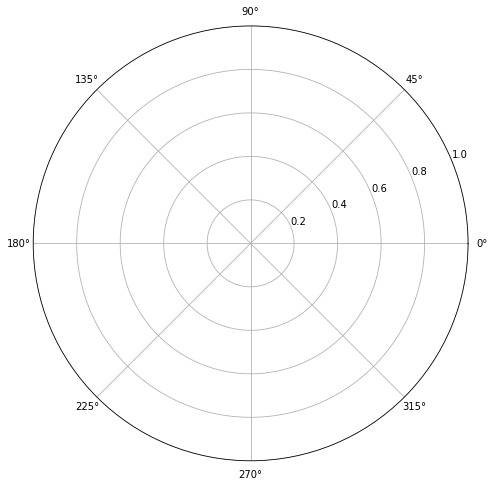

In [8]:
fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(111, projection='polar')

In [9]:
hadcrut['value'].min()

-0.660558823529412

In [10]:
hc_1850 = hadcrut[hadcrut['year'] == 1850]

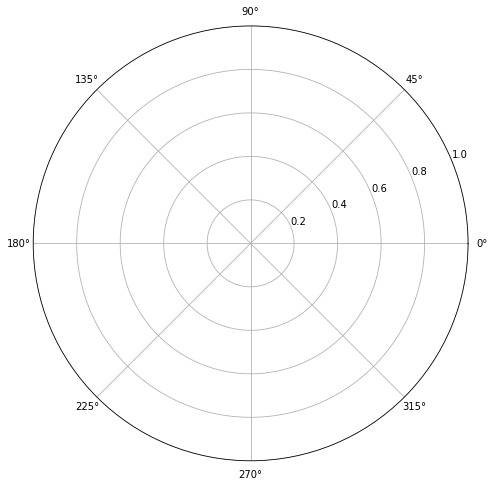

In [11]:
# Add 1 to temperature to make it positive
fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(111, projection='polar')

r = hc_1850['value'] + 1
theta = np.linspace(0, 2*np.pi, 12)

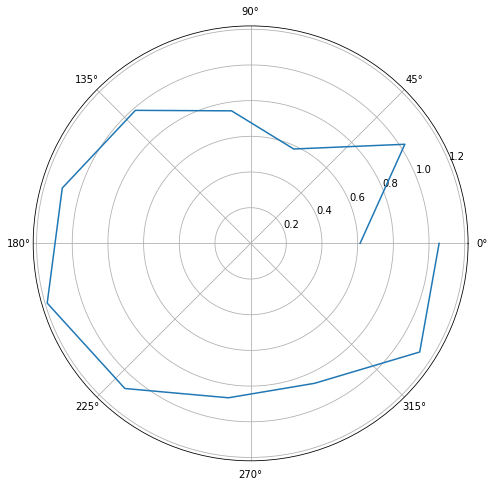

In [12]:
fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(111, projection='polar')

r = hc_1850['value'] + 1
theta = np.linspace(0, 2*np.pi, 12)

ax1.plot(theta,r)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  if sys.path[0] == '':


Text(0,0,'1850')

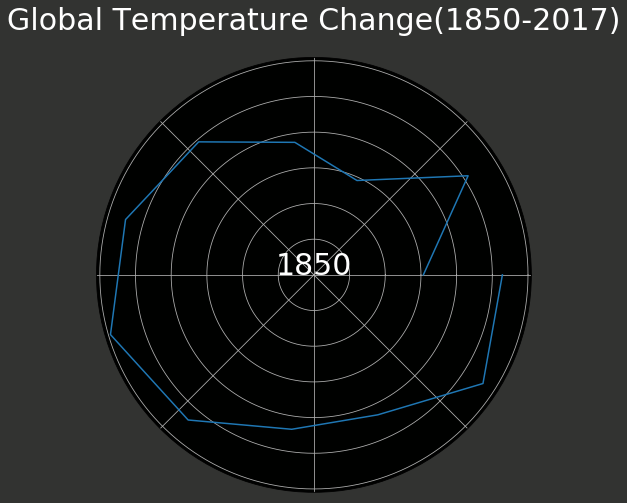

In [13]:
fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(111, projection='polar')

r = hc_1850['value'] + 1
theta = np.linspace(0, 2*np.pi, 12)

ax1.plot(theta,r)

ax1.axes.get_yaxis().set_ticklabels([])
ax1.axes.get_xaxis().set_ticklabels([])
fig.set_facecolor('#323331')
ax1.set_axis_bgcolor('#000100')
ax1.set_title("Global Temperature Change(1850-2017)", color='white', fontdict={'fontsize':30})
ax1.text(0,0,"1850", color='white', size=30, ha='center')

In [14]:
hadcrut['value'].max()

1.4244411764705882

In [15]:
ax1.set_ylim(0,3.25)

(0, 3.25)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  if sys.path[0] == '':


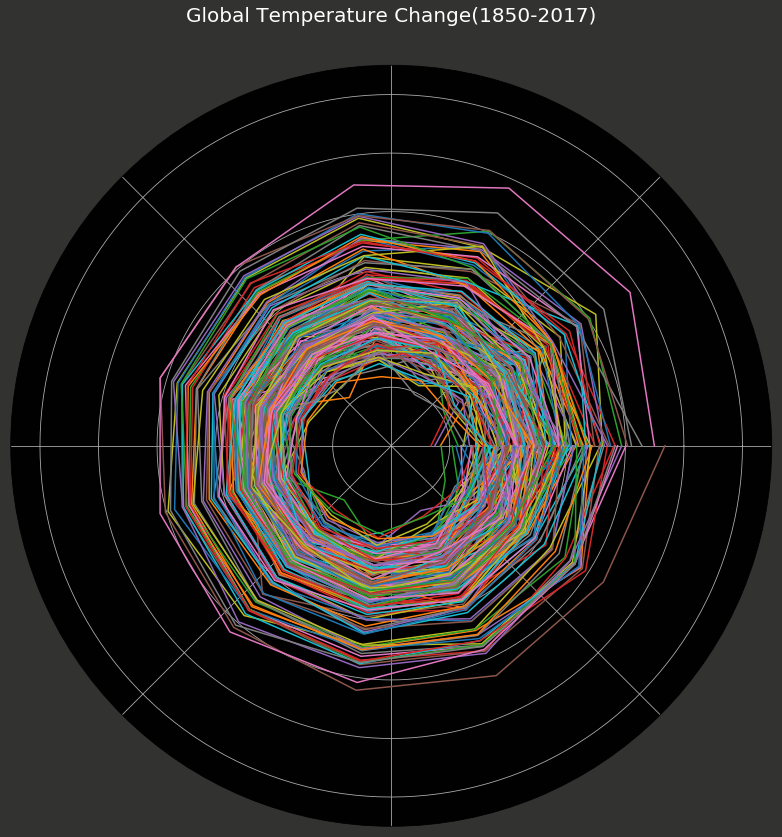

In [16]:
fig = plt.figure(figsize=(14,14))
ax1 = plt.subplot(111, projection='polar')

ax1.axes.get_yaxis().set_ticklabels([])
ax1.axes.get_xaxis().set_ticklabels([])
fig.set_facecolor("#323331")
ax1.set_ylim(0,3.25)

theta = np.linspace(0, 2*np.pi, 12)

ax1.set_title("Global Temperature Change(1850-2017)", color='white', fontdict={'fontsize':20})
ax1.set_axis_bgcolor('#000100')

years = hadcrut['year'].unique()

for year in years:
    r = hadcrut[hadcrut['year'] == year]['value'] + 1
    ax1.plot(theta,r)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  app.launch_new_instance()


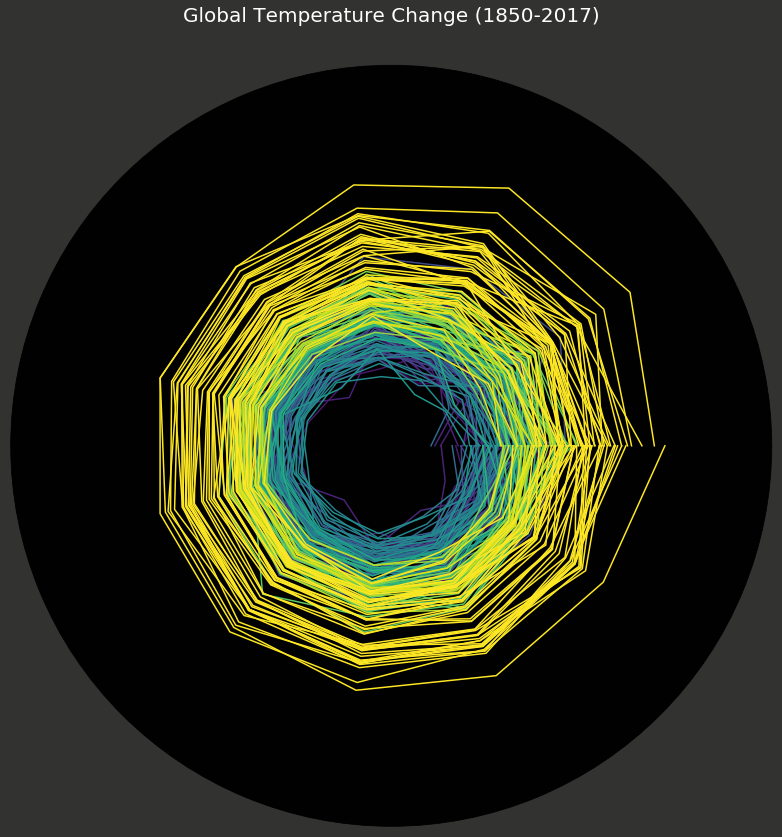

In [17]:
fig = plt.figure(figsize=(14,14))
ax1 = plt.subplot(111, projection='polar')

ax1.axes.get_yaxis().set_ticklabels([])
ax1.axes.get_xaxis().set_ticklabels([])
fig.set_facecolor("#323331")

for index, year in enumerate(years):
    r = hadcrut[hadcrut['year'] == year]['value'] + 1
    theta = np.linspace(0, 2*np.pi, 12)
    
    ax1.grid(False)
    ax1.set_title("Global Temperature Change (1850-2017)", color='white', fontdict={'fontsize': 20})
    
    ax1.set_ylim(0, 3.25)
    ax1.set_axis_bgcolor('#000100')
    ax1.plot(theta, r, c=plt.cm.viridis(index*2))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


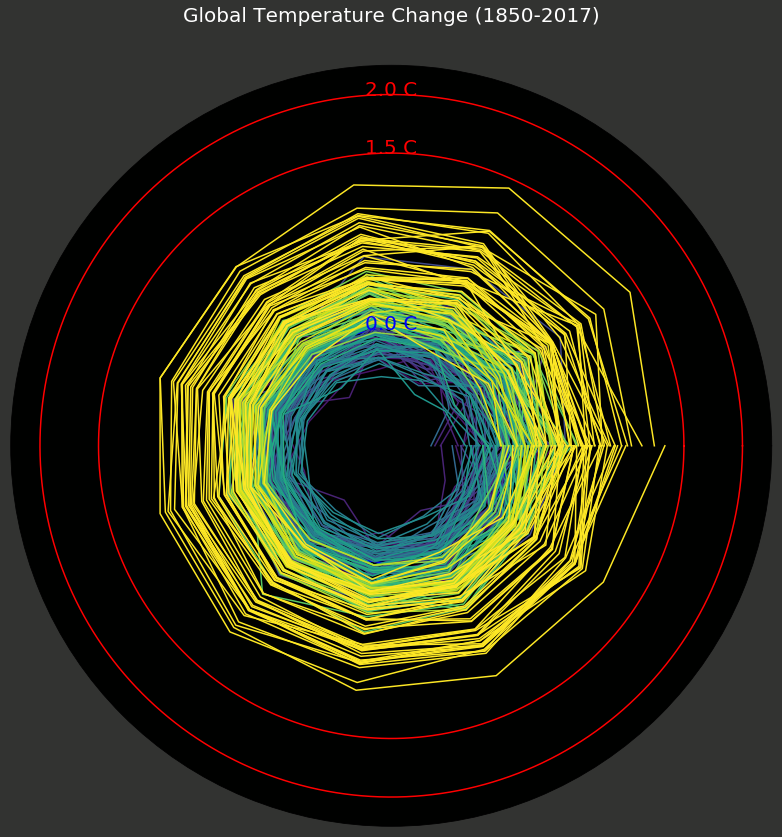

In [18]:
fig = plt.figure(figsize=(14,14))
ax1 = plt.subplot(111, projection='polar')

ax1.axes.get_yaxis().set_ticklabels([])
ax1.axes.get_xaxis().set_ticklabels([])
fig.set_facecolor("#323331")

full_circle_thetas = np.linspace(0, 2*np.pi, 1000)
blue_line_one_radii = [1.0]*1000
red_line_one_radii = [2.5]*1000
red_line_two_radii = [3.0]*1000

ax1.plot(full_circle_thetas, blue_line_one_radii, c='blue')
ax1.plot(full_circle_thetas, red_line_one_radii, c='red')
ax1.plot(full_circle_thetas, red_line_two_radii, c='red')

ax1.text(np.pi/2, 1.0, "0.0 C", color="blue", ha='center', fontdict={'fontsize': 20})
ax1.text(np.pi/2, 2.5, "1.5 C", color="red", ha='center', fontdict={'fontsize': 20})
ax1.text(np.pi/2, 3.0, "2.0 C", color="red", ha='center', fontdict={'fontsize': 20})

for index, year in enumerate(years):
    r = hadcrut[hadcrut['year'] == year]['value'] + 1
    theta = np.linspace(0, 2*np.pi, 12)
    
    ax1.grid(False)
    ax1.set_title("Global Temperature Change (1850-2017)", color='white', fontdict={'fontsize': 20})
    
    ax1.set_ylim(0, 3.25)
    ax1.set_axis_bgcolor('#000100')
    ax1.plot(theta, r, c=plt.cm.viridis(index*2))

# GIF Image

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


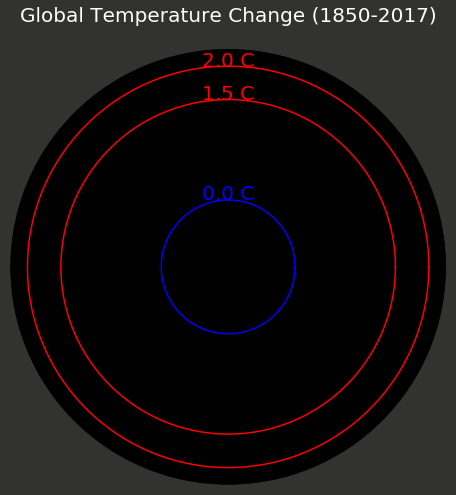

In [19]:
import sys
from matplotlib.animation import FuncAnimation

# Create the base plot
fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(111, projection='polar')
ax1.axes.get_yaxis().set_ticklabels([])
ax1.axes.get_xaxis().set_ticklabels([])
fig.set_facecolor("#323331")

full_circle_thetas = np.linspace(0, 2*np.pi, 1000)
blue_line_one_radii = [1.0]*1000
red_line_one_radii = [2.5]*1000
red_line_two_radii = [3.0]*1000

ax1.plot(full_circle_thetas, blue_line_one_radii, c='blue')
ax1.plot(full_circle_thetas, red_line_one_radii, c='red')
ax1.plot(full_circle_thetas, red_line_two_radii, c='red')

ax1.text(np.pi/2, 1.0, "0.0 C", color="blue", ha='center', fontdict={'fontsize': 20})
ax1.text(np.pi/2, 2.5, "1.5 C", color="red", ha='center', fontdict={'fontsize': 20})
ax1.text(np.pi/2, 3.0, "2.0 C", color="red", ha='center', fontdict={'fontsize': 20})

def update(i):
    # Specify how we want the plot to change in each frame.
    # We need to unravel the for loop we had earlier.
    year = years[i]
    
    r = hadcrut[hadcrut['year'] == year]['value'] + 1
    theta = np.linspace(0, 2*np.pi, 12)
    
    ax1.grid(False)
    ax1.set_title("Global Temperature Change (1850-2017)", color='white', fontdict={'fontsize': 20})
    
    ax1.set_ylim(0, 3.25)
    ax1.set_axis_bgcolor('#000100')
    
    return ax1

anim = FuncAnimation(fig, update, frames=len(years), interval=50)

anim.save('climate_spiral.gif', dpi=120, writer='imagemagick', savefig_kwargs={'facecolor': '#323331'})